In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [14]:
dataset=pd.read_csv('heart.csv')

In [15]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [18]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
categorical = ['sex', 'cp', 'restecg', 'slope', 'thal']
do_not_touch = ['fbs', 'exang']
non_categorical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [20]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical)],remainder='passthrough')
X = ct.fit_transform(dataset[categorical+do_not_touch+non_categorical])
y = dataset['target'].values

In [22]:
X[0,:]

array([  0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   1. ,   0. ,   0. ,
         1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
        63. , 145. , 233. , 150. ,   2.3,   0. ])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train[:,-6:] = scaler.fit_transform(X_train[:,-6:])
X_test[:,-6:] = scaler.transform(X_test[:,-6:])

In [26]:

X_train[0,:]

array([ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        , -0.61990074, -0.08877873,
        0.37511601,  0.91545786, -0.37805012, -0.70686683])

In [27]:
from sklearn.svm import SVC
estimator = SVC()

parameters = [{'kernel':['rbf'],
               'C':[1,10,100,1000],
               'gamma':[1,0.1,0.001,0.0001],
            },
            {'kernel':['poly'],
               'C':[1,10,100,1000],
               'gamma':[1,0.1,0.001,0.0001],
             'degree':range(1,5)}
             ]

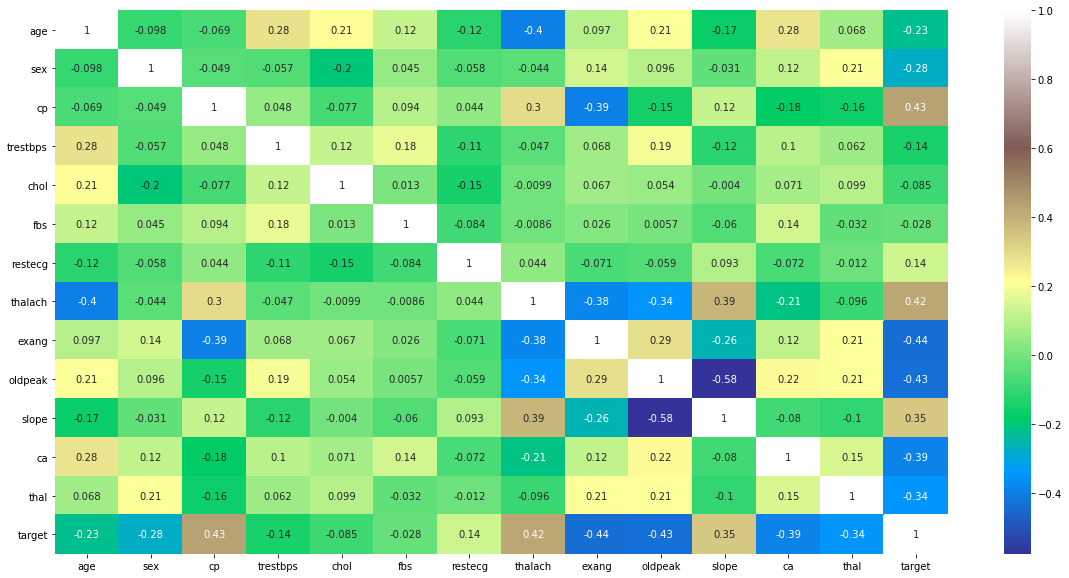

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap='terrain')

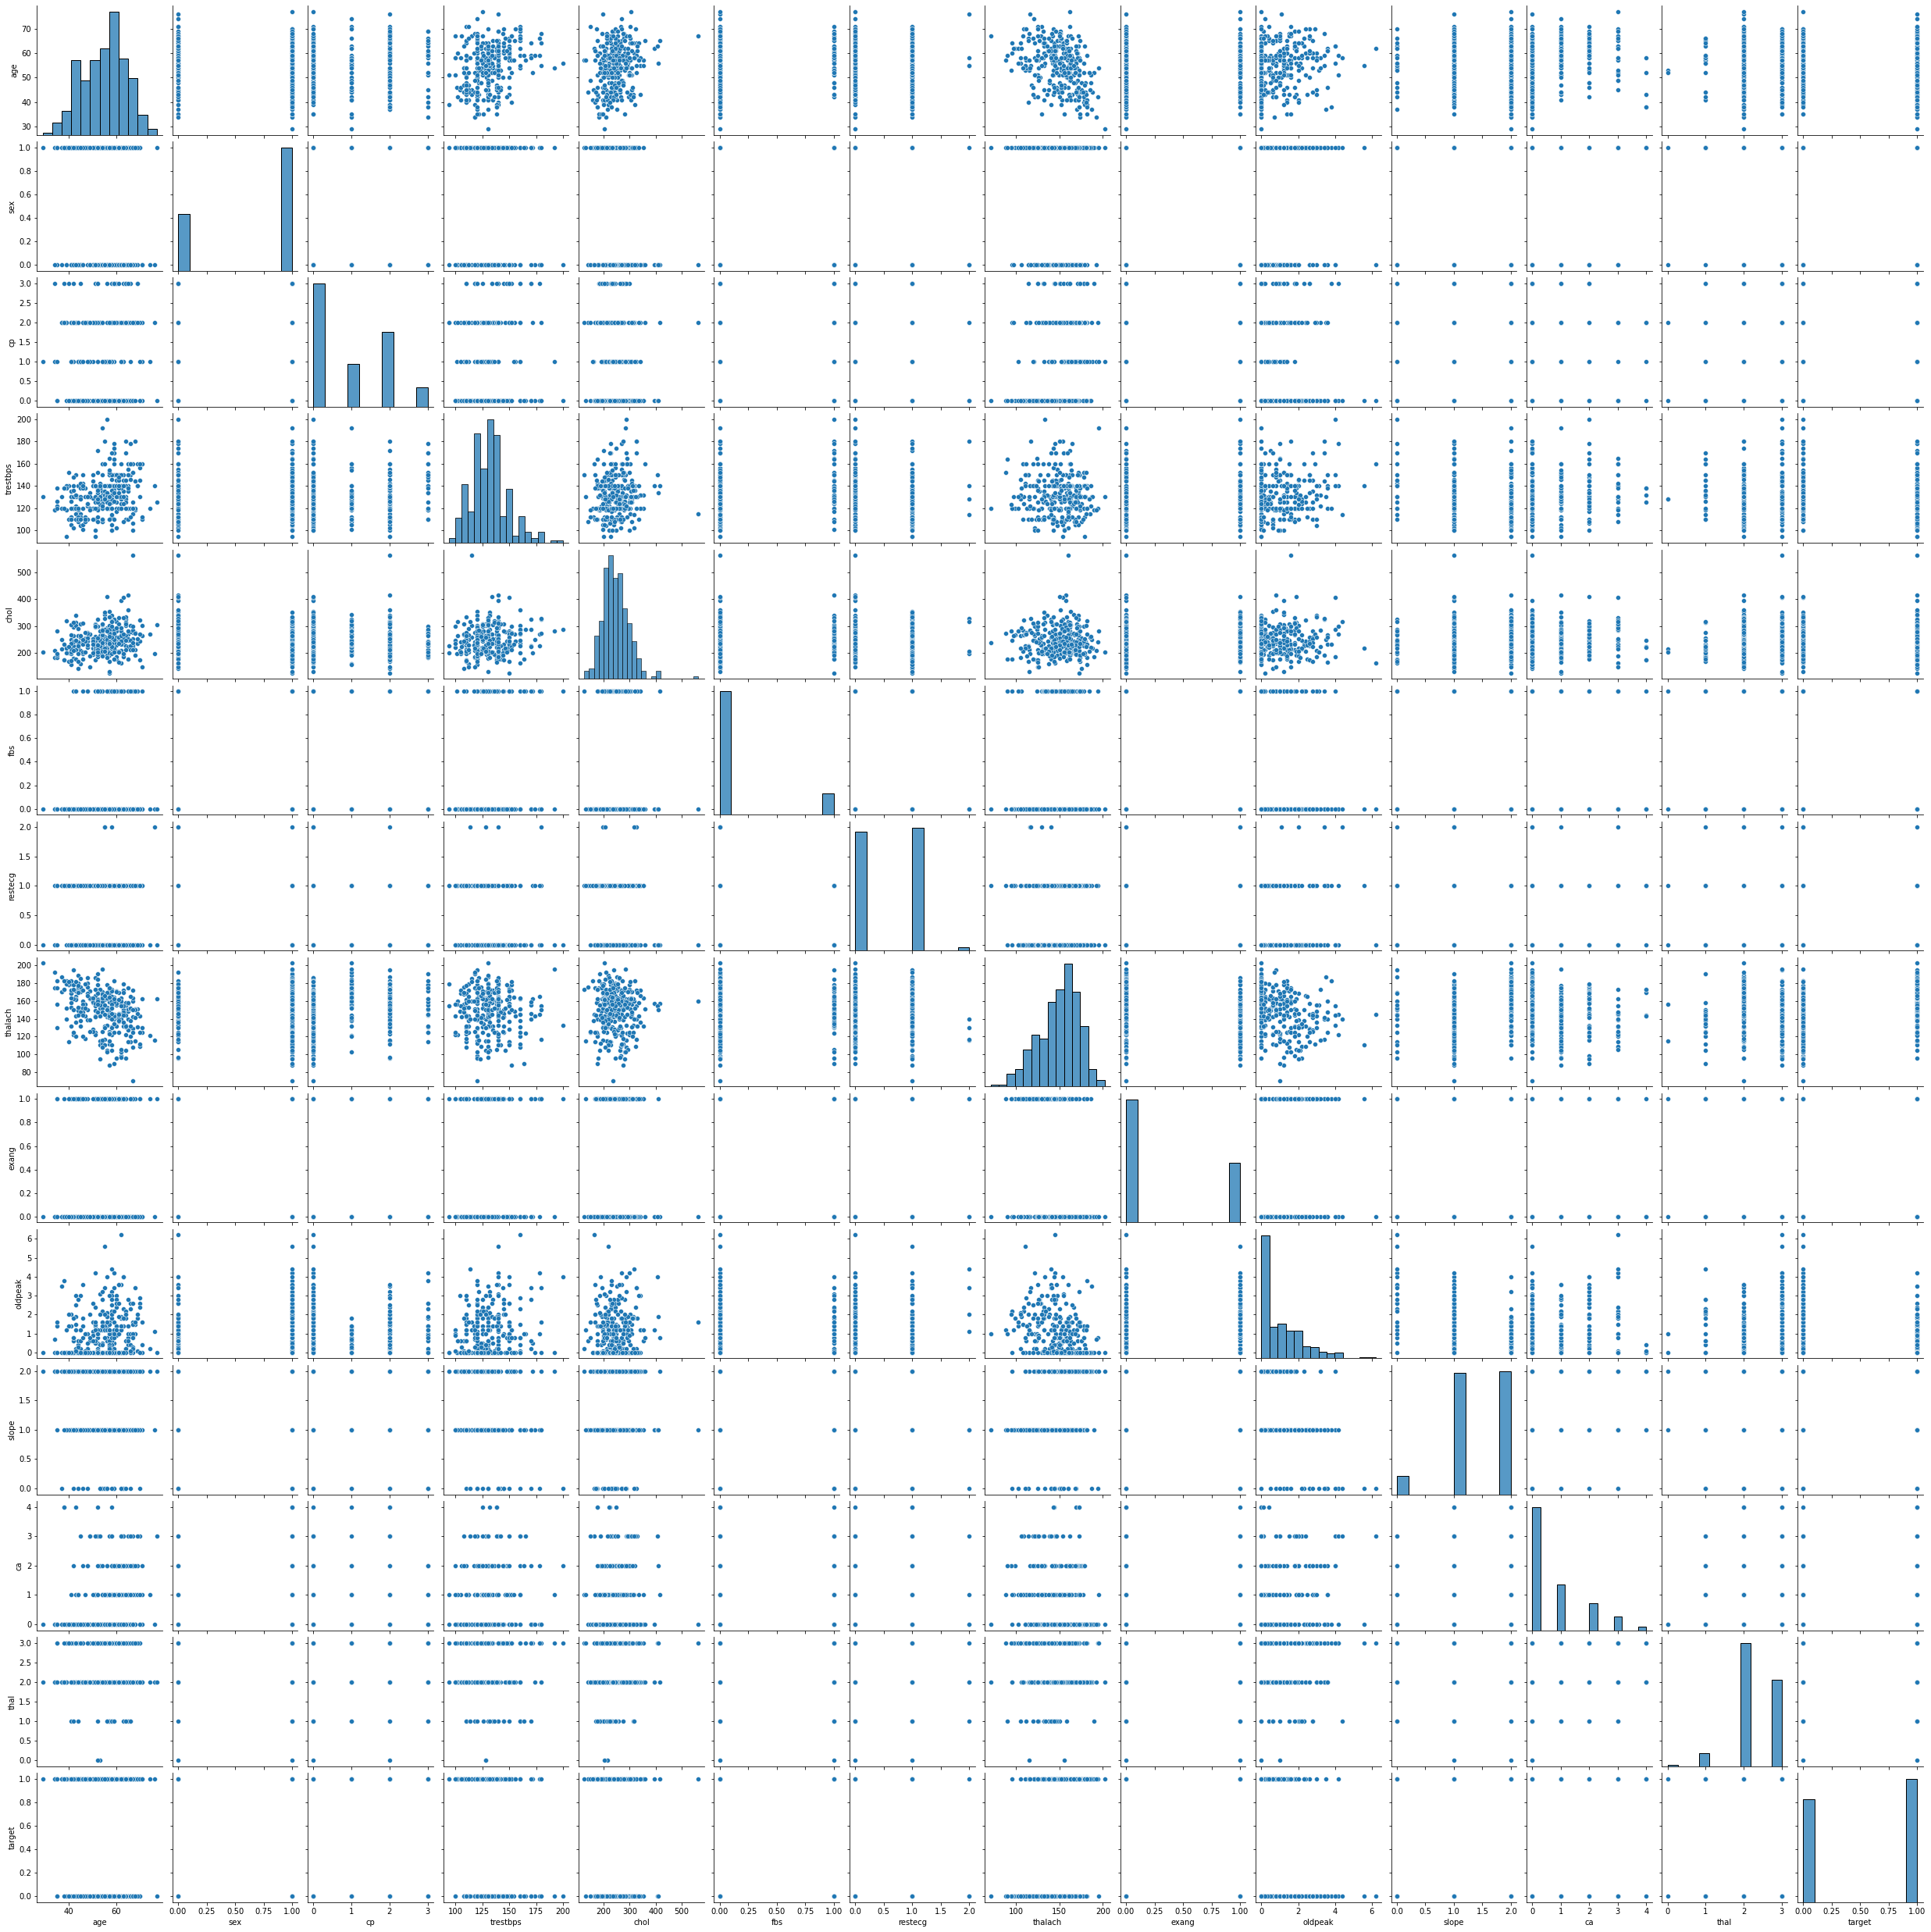

In [30]:
sns.pairplot(data=dataset)

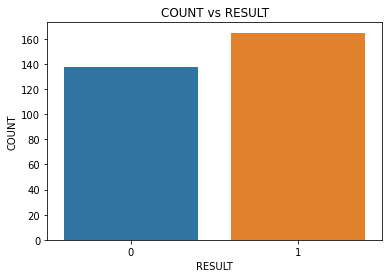

In [32]:
sns.countplot(dataset['target'])
plt.title("COUNT vs RESULT")
plt.xlabel("RESULT")
plt.ylabel("COUNT")
plt.show()

In [35]:
dataset=pd.get_dummies(dataset,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [37]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [39]:

y=dataset['target']
X=dataset.drop(['target'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(128,128),max_iter=300)
model.fit(xtrain,ytrain)


MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=300)

In [42]:

ypred=model.predict(xtest)

In [43]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,ypred)
print(acc*100)

85.24590163934425
